# #2020Census tweets analysis
**By Bernardo Lopez Vicencio, [NewsCounts](https://newscounts.org/)**

In this Jupyter Notebook we analyze different summary statistics about the tweets from 2020 that used the hashtag #2020Census.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
frames = []
for m in range(1,6):
    temp_df = pd.read_json(f"data/2020/all/f{m}.json",lines=False)
    frames.append(temp_df)
df_all = pd.concat(frames).sort_values(by=['created_at'])
df_all.reset_index(inplace = True,drop=True)

This is the dataset that we will be using:

In [3]:
df_all["date"] = df_all.created_at.dt.date
df_all["is_retweet"] = df_all.retweeted_status.notnull()
df_all.drop(columns=["extended_tweet","is_quote_status","retweeted_status"], axis=1,inplace=True)
print(df_all.shape)
df_all.head()

(432309, 27)


,coordinates,created_at,favorite_count,favorited,geo,hashtags,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,reply_count,retweet_count,retweeted,text,urls,user_id_str,user_mentions,username,date,is_retweet
0,None,2020-01-01 00:00:14,43,False,None,,1212161574313615360,None,NaN,NaN,...,1,33,False,"The census is coming in 2020, and it’s almost ...",['https://twitter.com/i/web/status/12121615743...,23092890,,uscensusbureau,2020-01-01,False
1,None,2020-01-01 00:01:03,2,False,None,['2020Census'],1212161777963810816,None,NaN,NaN,...,0,0,False,2019 IN REVIEW: With the #2020Census approachi...,['https://twitter.com/i/web/status/12121617779...,115569615,,EriksonPolicy,2020-01-01,False
2,None,2020-01-01 00:05:07,0,False,None,,1212162802749771776,None,NaN,NaN,...,0,0,False,RT @uscensusbureau: The census is coming in 20...,,27223236,['uscensusbureau'],jimmitchell70,2020-01-01,True
3,None,2020-01-01 00:07:51,0,False,None,['2020Census'],1212163489793499136,None,NaN,NaN,...,0,0,False,RT @hansilowang: 2. As we head into the new ye...,,4364923707,['hansilowang'],u3Y4BDE,2020-01-01,True
4,None,2020-01-01 00:09:00,2,False,None,['2020Census'],1212163778042900480,None,NaN,NaN,...,0,3,False,Both San Diego and Imperial Counties have been...,['https://twitter.com/i/web/status/12121637780...,241196732,['PANASanDiego'],RosenbergFound,2020-01-01,False


## Tweets per day

In [4]:
grouped_2020 = df_all.groupby("date")
grouped_2020=pd.DataFrame({"tweets": grouped_2020["id_str"].count()})
grouped_2020.index = pd.to_datetime(grouped_2020.index)

For this analysis we will divide the tweets between original tweets and retweets.

In [5]:
df_original = df_all[df_all.is_retweet==False ]
grouped_original = df_original.groupby("date")
grouped_original=pd.DataFrame({"tweets": grouped_original["id_str"].count()})
grouped_original.index = pd.to_datetime(grouped_original.index)
print(f"Original tweets {df_original.shape[0]}")

df_retweets = df_all[df_all.is_retweet ]
grouped_retweets = df_retweets.groupby("date")
grouped_retweets=pd.DataFrame({"tweets": grouped_retweets["id_str"].count()})
grouped_retweets.index = pd.to_datetime(grouped_retweets.index)
print(f"Retweets {df_retweets.shape[0]}")

print("\nTotal: ",df_original.shape[0]+df_retweets.shape[0])

Original tweets 134430
Retweets 297879

Total:  432309


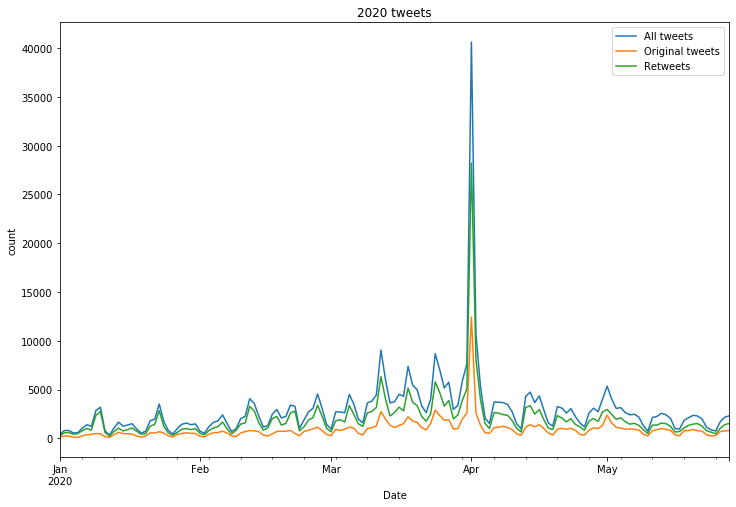

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
grouped_2020.tweets.plot(label="All tweets",ax = ax)
grouped_original.tweets.plot(label='Original tweets', ax = ax)
grouped_retweets.tweets.plot(label='Retweets', ax = ax)

plt.title("2020 tweets");
plt.ylabel("count")
plt.xlabel("Date");
plt.legend();

## How has the census media campaign affected?

According to the [Census Bureau](https://www.census.gov/newsroom/press-releases/2020/2020-census-ads-unveiling.html), this were the phases of the Census:
* **01/14/2020:** Phase 1, Awareness/Education.
* **03/13/2020:** Phase 2, Motivation/Participation.
* **05/13/2020:** Phase 3, Reminder/Nonresponse Follow Up.

This campaign was expanded on  [02/18/2020](https://www.census.gov/newsroom/press-releases/2020/2020-ad-campaign-expands.html).

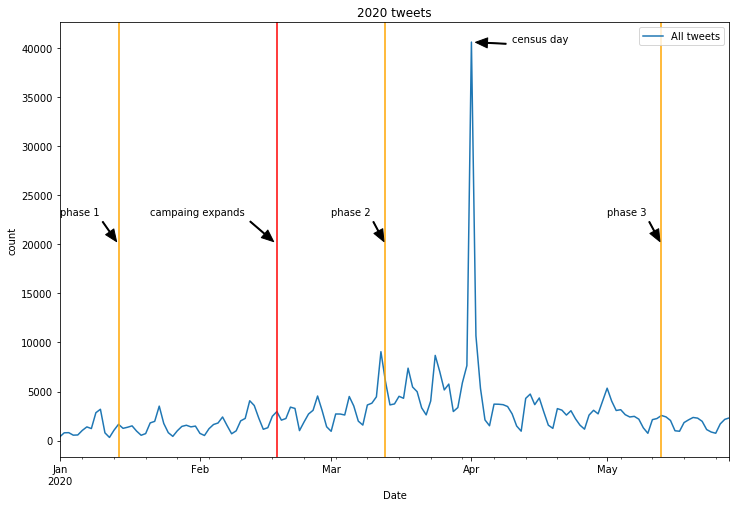

In [7]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
grouped_2020.tweets.plot(label="All tweets",ax = ax)
annotations = {
    "census day": {
        "kind": "arrow",
        "date": "2020-04-01",
        "date_text" : "2020-04-10",
        "value": grouped_2020.loc["2020-04-01","tweets"]
    },
    "campaing expands": {
        "kind": "line",
        "date": "2020-02-18",
        "date_text" : "2020-01-21",
        "value": 20000, "color": "red"
    },
    "phase 1": {
        "kind": "line",
        "date": "2020-01-14",
        "date_text" : "2020-01-01",
        "value": 20000, "color": "orange"
    },
    "phase 2": {
        "kind": "line",
        "date": "2020-03-13",
        "date_text" : "2020-03-01",
        "value": 20000, "color": "orange"
    },
    "phase 3": {
        "kind": "line",
        "date": "2020-05-13",
        "date_text" : "2020-05-01",
        "value": 20000, "color": "orange"
    },
}
for k in annotations:    
    if annotations[k]["kind"] == "arrow":
        ax.annotate(k, xy=(annotations[k]["date"], annotations[k]["value"]), 
                    xytext=(annotations[k]["date_text"], annotations[k]["value"]),
                    arrowprops=dict(facecolor='black', shrink=0.1,width=1,headwidth=10))
    else:
        ax.axvline(annotations[k]["date"],c=annotations[k]["color"])
        ax.annotate(k, xy=(annotations[k]["date"], annotations[k]["value"]), 
                    xytext=(annotations[k]["date_text"], annotations[k]["value"]+3000),
                    arrowprops=dict(facecolor='black', shrink=0.1,width=1,headwidth=10))

plt.title("2020 tweets");
plt.ylabel("count")
plt.xlabel("Date");
plt.legend();

### Days with more tweets

In [8]:
print("All tweets:")
print(grouped_2020.sort_values(["tweets"], ascending=False)["tweets"].iloc[:5])

print("\nOriginal tweets:")
print(grouped_original.sort_values(["tweets"], ascending=False)["tweets"].iloc[:5])

All tweets:
date
2020-04-01    40627
2020-04-02    10681
2020-03-12     9058
2020-03-24     8681
2020-03-31     7642
Name: tweets, dtype: int64

Original tweets:
date
2020-04-01    12428
2020-03-24     2899
2020-03-12     2738
2020-04-02     2609
2020-03-31     2579
Name: tweets, dtype: int64


## Most active users


In [9]:
import botometer

rapidapi_key = "8ad33b26a9msh41a64262eec69ebp154c57jsn98e6d9dac767"
twitter_app_auth = {
    'consumer_key': 'Kwl77ioHbYXqSBEuzqEWTbAh0',
    'consumer_secret': 'JPA43yQ2dHzG0NQvAXlBdooBBv39FoEI4j0EylpyGosCyM4mnK',
    'access_token': '500089812-PHGGkFGuQhdzAGfgE5csp9um2mYFHgDwTPDvDfKX',
    'access_token_secret': 'mz4wiZ6HtBDsBUeDFWJcaIMkR53SZM9uVH1p8QEEVspWZ',
  }

def is_bot(accounts,past_results = {}):
    bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

    r = []
    for account in accounts :       
        if account in past_results:
            r.append(past_results[account]["bot_proba"])
        else :
            result = bom.check_account("@"+account)
            if "cap" not in result:
                r.append(-1)
            else:
                r.append(result["cap"]["english"])
            
    return r

### Original tweets

In [10]:
grouped_u_o = df_original.groupby(df_original['username'])
grouped_u_o =pd.DataFrame({"tweets": grouped_u_o["id_str"].count(),"days": grouped_u_o["date"].nunique()})
grouped_u_o = grouped_u_o.sort_values(by=["tweets"],ascending=False)
grouped_u_o["position"] = np.arange(len(grouped_u_o))+1
grouped_u_o = grouped_u_o[["position","tweets","days"]]
grouped_u_o[:20]

,position,tweets,days
username,,,
hansilowang,1,836,115
uscensusbureau,2,454,126
KansasCounts,3,282,94
LawyersComm,4,273,81
HudsonCensus,5,265,83
SDIDEC,6,247,104
CTCounts2020,7,237,107
TrueNorth_CS,8,222,122
ABNYCensus2020,9,220,82


Using botometer library we obtained the probability of this accounts of being bots (Complete Automation Probability). 

The following are the accounts in the top 100 of most original tweets about the census that have more than 50% probability of being bots according to botometer.

In [28]:
grouped_u_o["bot_proba"] = -1
grouped_u_o.loc[:100,("bot_proba")] = is_bot(list(top_100_o.index[:100]))
grouped_u_o[grouped_u_o.bot_proba>=0.5]

,position,tweets,days,bot_proba
username,,,,
FOBPL,40,123,59,0.615973
Thewayresource,45,120,18,0.615973
tulsacounts,67,98,46,0.740523


## Retweets

Users with more retweets with #2020Census.

In [29]:
grouped_u_no = df_retweets.groupby(df_retweets['username'])
grouped_u_no =pd.DataFrame({"tweets": grouped_u_no["id_str"].count(),"days": grouped_u_no["date"].nunique()})
grouped_u_no = grouped_u_no.sort_values(by=["tweets"],ascending=False)
grouped_u_no["position"] = np.arange(len(grouped_u_no))+1
grouped_u_no = grouped_u_no[["position","tweets","days"]]
grouped_u_no[:20]

,position,tweets,days
username,,,
CensusPK,1,2337,149
All435Reps,2,1568,145
CountAllKids,3,1351,40
countme2020,4,877,51
KristenGrennan,5,594,110
allthingscensus,6,550,123
HispanicCaucus,7,500,90
census_ie,8,434,88
4americaschild,9,376,9


According to botometer, the accounts from the top 100 of most retweets about the census with at least 50% probability of being bots are:

In [43]:
grouped_u_no["bot_proba"] = -1
grouped_u_no.loc[:100,("bot_proba")] = is_bot(list(grouped_u_no.index[:100]), grouped_u_o.iloc[:100].to_dict("index"))
grouped_u_no[grouped_u_no.bot_proba>=0.5]

,position,tweets,days,bot_proba
username,,,,
CensusPK,1,2337,149,0.511452
GreenWins,49,164,49,0.666277


### All tweets

Top 20 of account with more overall tweets about the census.

In [44]:
grouped_u = df_all.groupby(df_all['username'])
grouped_u =pd.DataFrame({"tweets": grouped_u["id_str"].count(),"days": grouped_u["date"].nunique()})
grouped_u = grouped_u.sort_values(by=["tweets"],ascending=False)
grouped_u["position"] = np.arange(len(grouped_u))+1
grouped_u = grouped_u[["position","tweets","days"]]
grouped_u[:20]

,position,tweets,days
username,,,
CensusPK,1,2337,149
All435Reps,2,1568,145
CountAllKids,3,1457,43
countme2020,4,950,69
hansilowang,5,836,115
KristenGrennan,6,609,110
allthingscensus,7,551,123
HispanicCaucus,8,550,95
uscensusbureau,9,487,131


## What accounts are being retweeted the most?

In [45]:
retweets_per_user = pd.DataFrame(df_original.groupby(["username"]).retweet_count.sum()\
                                 .sort_values(ascending=False))
retweets_per_user.iloc[:20]

,retweet_count
username,
uscensusbureau,25138
hansilowang,17379
staceyabrams,7403
CACensus,4065
vanitaguptaCR,3733
CarolynBMaloney,3449
micensus,2755
HouseDemocrats,2314
GOPoversight,2195


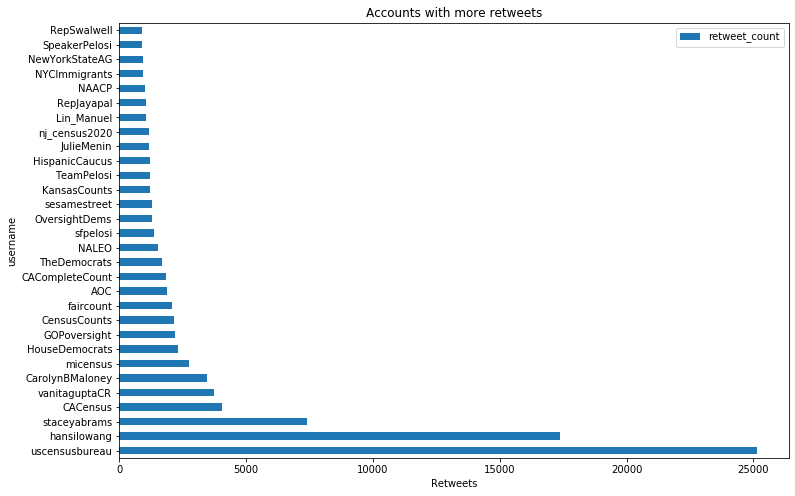

In [46]:
fig = plt.figure(figsize=(12,8));
ax = plt.gca()
retweets_per_user.iloc[:30].plot(kind="barh",ax=ax);
plt.title("Accounts with more retweets");
ax.set_xlabel("Retweets");

## Language

In [47]:
all_tweets = df_all.shape[0]
undetermined = df_all[df_all.lang=="und"].shape[0]

print("Tweets with undetermined language:",round(undetermined*100/all_tweets,2),"%")
print("Tweets with language determined:",round((1-undetermined/all_tweets)*100,2),"%")

Tweets with undetermined language: 1.42 %
Tweets with language determined: 98.58 %


en       98.207112
es        1.226466
other     0.566422
Name: lang, dtype: float64


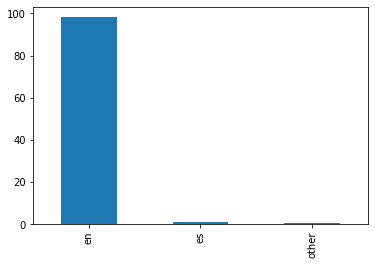

In [48]:
langs = ["en","es"]
langs_count = df_all[df_all.lang!="und"].lang.map(lambda x: x if x in langs else "other").value_counts()
print(langs_count*100/(all_tweets-undetermined))
(langs_count.sort_values(ascending=False)*100.0/(all_tweets-undetermined)).plot(kind = 'bar');

## Shared urls

In [49]:
from pyspark.sql import SparkSession

spark= SparkSession.builder.getOrCreate()

rdd_all = spark.createDataFrame(df_all[df_all.urls!=""][["date","urls"]]).rdd

In [50]:
data_all = rdd_all.map(lambda x: (x[0],x[1].lstrip("[").rstrip("]").lower().split(",")  ))\
.flatMapValues(lambda x: x).map(lambda x: (x[0],x[1].strip("'").strip().rstrip("/")))\
.map(lambda x: ( x[1], [x[0]] )).reduceByKey(lambda x,y: x+y ).map(lambda x: (x[0],len(x[1]),x[1]  ))

In [52]:
df_urls_all = data_all.toDF().toPandas()
df_urls_all.columns = ["url","count","dates"]
df_urls_all.sort_values(by="count",ascending=False,inplace=True)
df_urls_all.reset_index(inplace=True)
df_urls_all=df_urls_all[["url","count","dates"]]
df_urls_all.loc[:50]

,url,count,dates
0,http://my2020census.gov,5301,"[2020-02-06, 2020-02-16, 2020-02-16, 2020-02-1..."
1,http://2020census.gov,3747,"[2020-01-04, 2020-01-04, 2020-01-04, 2020-01-0..."
2,https://my2020census.gov,1592,"[2020-03-10, 2020-03-10, 2020-03-10, 2020-03-1..."
3,https://2020census.gov,1459,"[2020-01-27, 2020-01-31, 2020-02-01, 2020-02-0..."
4,https://2020census.gov?cid=22906:15_ctch-video...,726,"[2020-03-17, 2020-03-20, 2020-03-21, 2020-03-2..."
5,https://2020census.gov?cid=23678:16x9_ttpk-sta...,579,"[2020-03-31, 2020-04-01, 2020-04-01, 2020-04-0..."
6,http://www.2020census.gov,544,"[2020-02-04, 2020-02-05, 2020-02-05, 2020-02-0..."
7,http://www.my2020census.gov,495,"[2020-03-05, 2020-03-11, 2020-03-11, 2020-03-1..."
8,https://2020census.gov?cid=23685:16x9_ttpr-sta...,470,"[2020-03-31, 2020-04-01, 2020-04-01, 2020-04-0..."
9,https://2020census.gov/en.html,389,"[2020-01-15, 2020-02-08, 2020-02-09, 2020-02-1..."
